In [1]:
# Script to generate plots for ssd mobility performance
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from celluloid import Camera
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pandas as pd 
from scipy import signal
import textwrap
from scipy.signal import butter, lfilter
import math
import imutils
import os
import glob
%matplotlib inline

In [15]:
Locate

,trial_num,device,mode,location,devicemode,Response_time,Contact_time,Average_velocity,Max_velocity,Margin_stability,...,lmt5,lmt23,lmt1,rheel,rlmal,rmmal,rmt5,rmt23,rmt1,subject_id
1,LOCATE 1,Cane,None,4,Cane None,9.691666,10.683333,0.324797,0.601539,58.427861,...,"[[-1701.8041992188, 1273.6585693359, 31.907386...","[[-1667.5400390625, 1244.8941650391, 42.022441...","[[-1648.6934814453, 1208.4296875, 42.785427093...","[[-1821.2547607422, 1057.9368896484, 42.244491...","[[-1779.3161621094, 1005.1351928711, 72.133293...","[[-1755.1859130859, 1084.6864013672, 81.378166...","[[-1684.8395996094, 969.8455810547, 33.0149726...","[[-1650.9847412109, 1001.9508056641, 39.037563...","[[-1638.4897460938, 1041.6159667969, 45.230205...",P1
2,LOCATE 2,MiniGuide,Depth,1,MiniGuideDepth,0.700000,4.941667,0.245578,0.483133,115.780932,...,"[[-1728.3758544922, 1326.1392822266, 32.215618...","[[-1691.2457275391, 1300.5823974609, 41.634056...","[[-1669.8823242188, 1266.8288574219, 42.631572...","[[-1821.9442138672, 1077.3839111328, 40.995590...","[[-1774.2244873047, 1031.0357666016, 71.838035...","[[-1757.3471679688, 1112.8868408203, 79.802207...","[[-1676.2849121094, 1007.1929321289, 32.806861...","[[-1646.4053955078, 1042.60546875, 39.03886413...","[[-1638.4133300781, 1083.3034667969, 45.107715...",P1
3,LOCATE 3,Cane,None,2,Cane None,3.691666,4.883333,0.266019,0.643706,308.786013,...,"[[-1658.0964355469, 1281.8010253906, 31.794733...","[[-1628.5710449219, 1246.5361328125, 41.811462...","[[-1617.0517578125, 1207.5106201172, 42.623748...","[[-1809.0356445312, 1076.9587402344, 42.465324...","[[-1771.6262207031, 1020.8792724609, 72.601364...","[[-1737.5789794922, 1095.9678955078, 80.319267...","[[-1682.5070800781, 975.0371704102, 32.8088150...","[[-1645.2980957031, 1004.4119262695, 38.730995...","[[-1629.23046875, 1041.9816894531, 44.75133514...",P1
4,LOCATE 4,vOICe,Depth,2,vOICeDepth,1.183333,6.333333,0.178547,0.628704,125.477465,...,"[[-1656.4486083984, 1319.5017089844, 31.257898...","[[-1625.5861816406, 1287.4310302734, 41.821365...","[[-1610.0993652344, 1248.9467773438, 42.556610...","[[-1802.7475585938, 1126.3283691406, 42.081367...","[[-1765.4591064453, 1069.3980712891, 72.306015...","[[-1731.1477050781, 1145.2257080078, 80.238616...","[[-1675.3881835938, 1024.8641357422, 32.049255...","[[-1638.576171875, 1054.2524414062, 38.5949058...","[[-1622.7354736328, 1092.3004150391, 44.711952...",P1
5,LOCATE 5,vOICe,Intensity,4,vOICeIntensity,9.750000,37.358333,0.152379,0.582265,96.865256,...,"[[-1703.8690185547, 1265.3659667969, 31.920595...","[[-1669.8049316406, 1236.2921142578, 42.158946...","[[-1651.5991210938, 1199.4669189453, 43.012744...","[[-1832.76171875, 1054.9995117188, 42.02798080...","[[-1791.5711669922, 1001.7640380859, 72.754486...","[[-1764.0892333984, 1080.4456787109, 79.534996...","[[-1698.1878662109, 964.0854492188, 33.3902168...","[[-1664.1072998047, 995.6086425781, 39.2263870...","[[-1650.6770019531, 1034.9411621094, 45.064510...",P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,LOCATE 20,Cane,None,5,Cane None,0.000000,19.883333,0.319202,0.670857,107.439634,...,"[[-1765.0306396484, 1331.1267089844, 17.537702...","[[-1717.8870849609, 1304.6717529297, 35.390205...","[[-1701.5706787109, 1251.9034423828, 29.164562...","[[-1840.4155273438, 1044.7390136719, 46.093029...","[[-1788.0390625, 1007.9259033203, 70.276573181...","[[-1797.7532958984, 1084.5645751953, 75.040191...","[[-1699.9088134766, 995.9932861328, 21.8595867...","[[-1666.9256591797, 1039.1484375, 37.092998504...","[[-1675.6845703125, 1084.2052001953, 39.498374...",P10
21,LOCATE 21,MiniGuide,Depth,3,MiniGuideDepth,6.166667,10.758333,0.130075,0.474490,205.434323,...,"[[-1686.6108398438, 1335.2479248047, 13.838843...","[[-1645.7595214844, 1303.3155517578, 35.867752...","[[-1637.3106689453, 1248.6153564453, 31.061019...","[[-1767.0311279297, 1052.1395263672, 44.574058...","[[-1705.8634033203, 1031.1885986328, 68.786613...","[[-1735.2523

In [63]:
from Process import *
config_filepath = 'None' #file_list[0]
marker_filepath = r'E:\data\test_results\P2\Session_preprocessed\AVOID01.c3d'
recording_filepath = 'None' #file_list[0]
self = LowVisionSubjectAvoid(config_filepath, marker_filepath, recording_filepath)

Participants = ['P1','P2','P3','P5','P7','P9','P10']
random = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet9')
random.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
Locate = pd.DataFrame()
subject_num = 1

for Participants_id in Participants: 

    folder_path = os.path.join(r'E:\data\test_results', Participants_id ,'Session_preprocessed')
    results = pd.read_json(os.path.join(folder_path,'results_locate.json'),orient="split")

    # Sort the index to get the correct trial index
    results.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    results = results.sort_index(ascending=True)
    results = results.iloc[0:25,:]

    # Inport random sheet to get trial info 
    results = pd.concat([random, results], axis=1)
    
    results['subject_id'] = Participants_id
    results['Average_cane_angle'] = results['CaneAngle'].apply(lambda x: np.mean(abs(np.array([sublist[1] for sublist in x]))))
    results['Deviation_mean'] = results['Deviation'].apply(lambda x: np.mean(x))
    results['Deviation_all'] = results['Deviation'].apply(lambda x: sum(x))  
    results['Mos_mean'] = results['Margin_stability_all'].apply(lambda x: np.mean(x))
    results['Mos_all'] = results['Margin_stability_all'].apply(lambda x: sum(x))
    results['Mos_peak'] = results['Margin_stability_all'].apply(lambda x: max(x))
    results['vel_data'] = results['COFM_absvel'].apply(lambda x: self.velocity(np.array([item for sublist in x for item in sublist]).reshape(-1, 3)))
    results['hesitation_segments'] = results['vel_data'].apply(lambda x: sum(len(sublist) for sublist in self.hesitations(x[0])[1]))
    results['Found_distance_int'] = results['Found_distance'].apply(lambda x: np.array(x))
    results['Detection_index'] = results['Response_time'].apply(lambda x: 0 if x==0 else 1)
    results['subject_num'] = subject_num
    
    subject_num +=1 
    Locate = pd.concat([Locate,results])
    

In [64]:
Locate.drop(columns= ['COFM', 'COFM_absvel', 'COFM_lvel',
       'CYL_center', 'Canec', 'CaneAngle', 'Cane_vel','lheel', 'llmal',
       'lmmal', 'lmt5', 'lmt23', 'lmt1', 'rheel', 'rlmal', 'rmmal', 'rmt5',
       'rmt23', 'rmt1','vel_data']);

In [65]:
# Average data comparision 
cane_near = Locate[(Locate.devicemode == 'Cane None') & (Locate.location.isin([1,2,3]))]
cane_far = Locate[(Locate.devicemode == 'Cane None') & (Locate.location.isin([4,5,6]))]
mini_near = Locate[(Locate.devicemode == 'MiniGuideDepth') & (Locate.location.isin([1,2,3]))]
mini_far = Locate[(Locate.devicemode == 'MiniGuideDepth') & (Locate.location.isin([4,5,6]))]
voiceinten_near = Locate[(Locate.devicemode == 'vOICeIntensity') & (Locate.location.isin([1,2,3]))]
voiceinten_far = Locate[(Locate.devicemode == 'vOICeIntensity') & (Locate.location.isin([4,5,6]))]
voicedepth_near = Locate[(Locate.devicemode == 'vOICeDepth') & (Locate.location.isin([1,2,3]))]
voicedepth_far = Locate[(Locate.devicemode == 'vOICeDepth') & (Locate.location.isin([4,5,6]))]

In [68]:
cane_near['condition'] =1
mini_near['condition'] = 2
new = pd.concat([cane_near, mini_near], ignore_index=True)


folder_results_parent = r'E:\data\test_results'
file_path = os.path.join(folder_results_parent, r'results_cane_mini_near.xlsx')

new.to_excel(file_path, index=False)


C:\Users\jinr2.STUDENT\AppData\Local\Temp\ipykernel_17436\1585411196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cane_near['condition'] =1
C:\Users\jinr2.STUDENT\AppData\Local\Temp\ipykernel_17436\1585411196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_near['condition'] = 2


In [47]:
barWidth = 0.15
locate_xtick = ['Cane','MiniGuide','vOICe-Intensity','vOICe-Depth']
avoid_xtick = ['Cane','MiniGuide','vOICe-Depth']
br1 = np.arange(len(locate_xtick))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br_list = [br1, br2, br3, br4, br5]
c_list = ['blue','red','green','yellow','black']
x_tick_loc_locate = np.sum(br_list,axis=0)/len(Participants)
x_tick_loc_avoid = np.sum([item[0:3] for item in br_list],axis=0)/len(Participants)

Text(0.5, 0.98, 'Response Time')

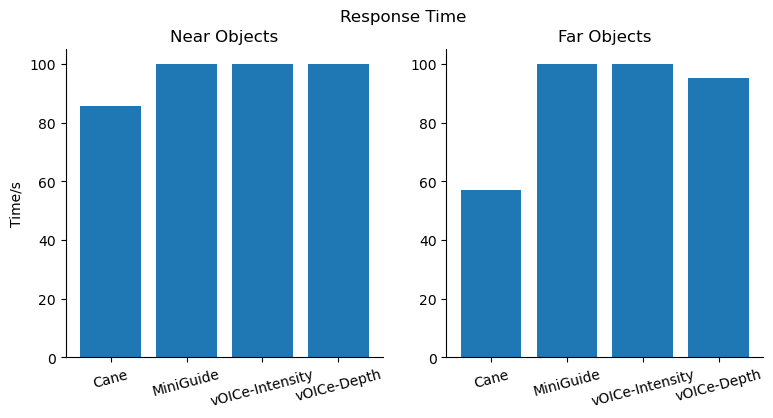

In [50]:
# Successful rate near and far 

# Create a figure and axis
fig, axs = plt.subplots(1,2,figsize=(9,4));

# axs[0].boxplot([cane_near.Response_time[cane_near.Response_time != 0], mini_near.Response_time[mini_near.Response_time!=0],voiceinten_near.Response_time[voiceinten_near.Response_time!=0],voicedepth_near.Response_time[voicedepth_near.Response_time!0]],labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'],  showfliers=False);

axs[0].bar(locate_xtick, [cane_near['Detection_index'].value_counts().get(1,0)/len(cane_near)*100,\
                         mini_near['Detection_index'].value_counts().get(1,0)/len(mini_near)*100,\
                         voiceinten_near['Detection_index'].value_counts().get(1,0)/len(voiceinten_near)*100,\
                         voicedepth_near['Detection_index'].value_counts().get(1,0)/len(voicedepth_near)*100]);

axs[0].set_xticks([0,1,2,3],locate_xtick, rotation = 15)

axs[1].bar(locate_xtick, [cane_far['Detection_index'].value_counts().get(1,0)/len(cane_far)*100,\
                         mini_far['Detection_index'].value_counts().get(1,0)/len(mini_far)*100,\
                         voiceinten_far['Detection_index'].value_counts().get(1,0)/len(voiceinten_far)*100,\
                         voicedepth_far['Detection_index'].value_counts().get(1,0)/len(voicedepth_far)*100]);



axs[1].set_xticks([0,1,2,3],locate_xtick, rotation = 15);

# axs[0].set_ylim([0,50])
# axs[1].set_ylim([0,50])

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[0].set_title('Near Objects')
axs[1].set_title('Far Objects')
axs[0].set_ylabel('Time/s')
fig.suptitle('Response Time')

Text(0.5, 0.98, 'Response Time')

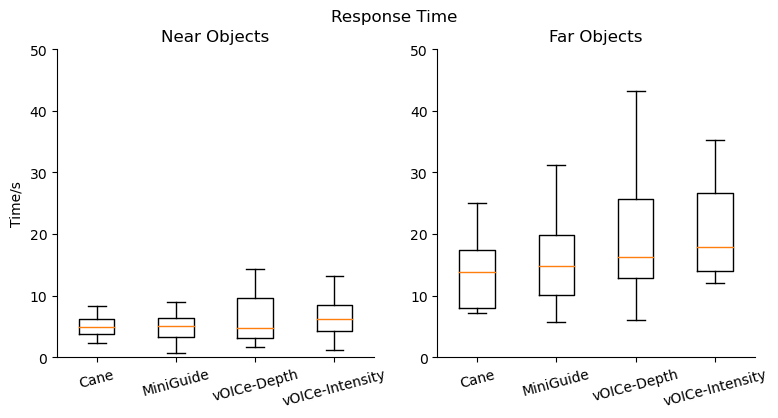

In [83]:
# Response time near and far 

# Create a figure and axis
fig, axs = plt.subplots(1,2,figsize=(9,4));

# axs[0].boxplot([cane_near.Response_time[cane_near.Response_time != 0], mini_near.Response_time[mini_near.Response_time!=0],voiceinten_near.Response_time[voiceinten_near.Response_time!=0],voicedepth_near.Response_time[voicedepth_near.Response_time!0]],labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'],  showfliers=False);

axs[0].boxplot([
    cane_near.Response_time[cane_near.Response_time != 0],
    mini_near.Response_time[mini_near.Response_time != 0],
    voiceinten_near.Response_time[voiceinten_near.Response_time != 0],
    voicedepth_near.Response_time[voicedepth_near.Response_time != 0]
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'], showfliers=False);

axs[0].set_xticks([1,2,3,4],locate_xtick, rotation = 15)

axs[1].boxplot([
    cane_far.Response_time[cane_far.Response_time != 0],
    mini_far.Response_time[mini_far.Response_time != 0],
    voiceinten_far.Response_time[voiceinten_far.Response_time != 0],
    voicedepth_far.Response_time[voicedepth_far.Response_time != 0]
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'], showfliers=False);

axs[1].set_xticks([1,2,3,4],locate_xtick, rotation = 15);

axs[0].set_ylim([0,50])
axs[1].set_ylim([0,50])

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[0].set_title('Near Objects')
axs[1].set_title('Far Objects')
axs[0].set_ylabel('Time/s')
fig.suptitle('Response Time')

Text(0.5, 0.98, 'Contact Time')

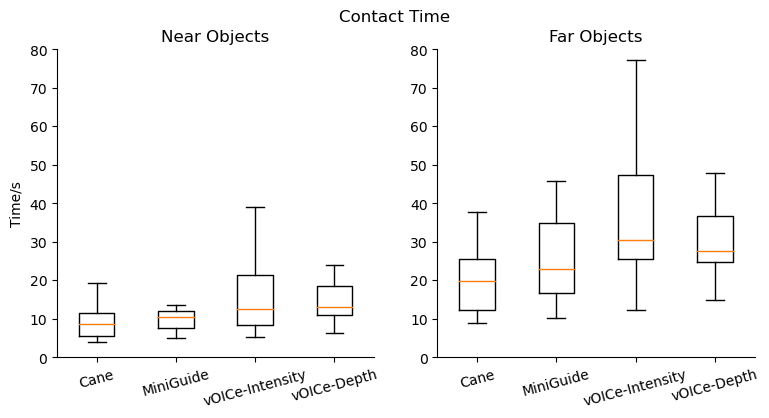

In [51]:
# Contac time near and far

# Create a figure and axis
fig, axs = plt.subplots(1,2,figsize=(9,4));

# axs[0].boxplot([cane_near.Response_time[cane_near.Response_time != 0], mini_near.Response_time[mini_near.Response_time!=0],voiceinten_near.Response_time[voiceinten_near.Response_time!=0],voicedepth_near.Response_time[voicedepth_near.Response_time!0]],labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'],  showfliers=False);

axs[0].boxplot([
    cane_near.Contact_time[cane_near.Contact_time != 0],
    mini_near.Contact_time[mini_near.Contact_time != 0],
    voiceinten_near.Contact_time[voiceinten_near.Contact_time != 0],
    voicedepth_near.Contact_time[voicedepth_near.Contact_time != 0]
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'], showfliers=False);

axs[0].set_xticks([1,2,3,4],locate_xtick, rotation = 15)

axs[1].boxplot([
    cane_far.Contact_time[cane_far.Contact_time != 0],
    mini_far.Contact_time[mini_far.Contact_time != 0],
    voiceinten_far.Contact_time[voiceinten_far.Contact_time != 0],
    voicedepth_far.Contact_time[voicedepth_far.Contact_time != 0]
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'], showfliers=False);

axs[1].set_xticks([1,2,3,4],locate_xtick, rotation = 15);

axs[0].set_ylim([0,80])
axs[1].set_ylim([0,80])

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[0].set_title('Near Objects')
axs[1].set_title('Far Objects')
axs[0].set_ylabel('Time/s')
fig.suptitle('Contact Time')

Text(0.5, 0.98, 'Travel distance')

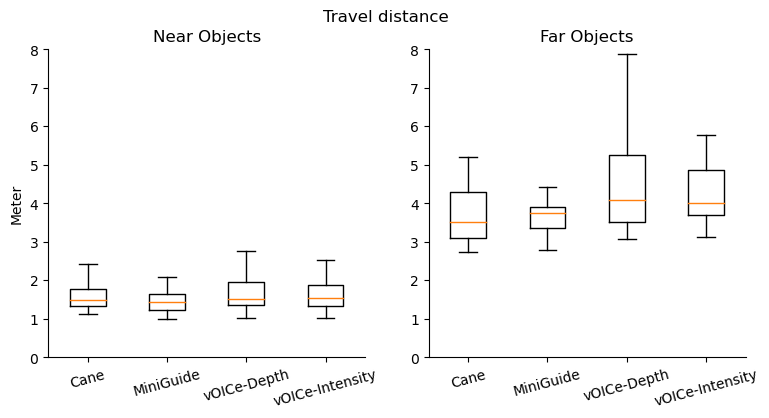

In [85]:
# Travel distance near and far

# Create a figure and axis
fig, axs = plt.subplots(1,2,figsize=(9,4));

# axs[0].boxplot([cane_near.Response_time[cane_near.Response_time != 0], mini_near.Response_time[mini_near.Response_time!=0],voiceinten_near.Response_time[voiceinten_near.Response_time!=0],voicedepth_near.Response_time[voicedepth_near.Response_time!0]],labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'],  showfliers=False);

axs[0].boxplot([
    cane_near.Travel_distance[cane_near.Travel_distance != 0],
    mini_near.Travel_distance[mini_near.Travel_distance != 0],
    voiceinten_near.Travel_distance[voiceinten_near.Travel_distance != 0],
    voicedepth_near.Travel_distance[voicedepth_near.Travel_distance != 0]
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'], showfliers=False);

axs[0].set_xticks([1,2,3,4],locate_xtick, rotation = 15)

axs[1].boxplot([
    cane_far.Travel_distance[cane_far.Travel_distance != 0],
    mini_far.Travel_distance[mini_far.Travel_distance != 0],
    voiceinten_far.Travel_distance[voiceinten_far.Travel_distance != 0],
    voicedepth_far.Travel_distance[voicedepth_far.Travel_distance != 0]
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'], showfliers=False);

axs[1].set_xticks([1,2,3,4],locate_xtick, rotation = 15);

axs[0].set_ylim([0,8])
axs[1].set_ylim([0,8])

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[0].set_title('Near Objects')
axs[1].set_title('Far Objects')
axs[0].set_ylabel('Meter')
fig.suptitle('Travel distance')

Text(0.5, 0.98, 'Average cane angle')

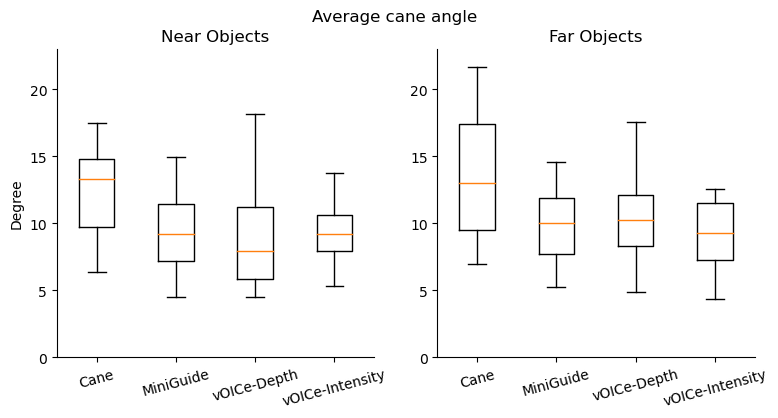

In [86]:
# Average cane angle 

# Create a figure and axis
fig, axs = plt.subplots(1,2,figsize=(9,4));

# axs[0].boxplot([cane_near.Response_time[cane_near.Response_time != 0], mini_near.Response_time[mini_near.Response_time!=0],voiceinten_near.Response_time[voiceinten_near.Response_time!=0],voicedepth_near.Response_time[voicedepth_near.Response_time!0]],labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'],  showfliers=False);

axs[0].boxplot([
    cane_near.Average_cane_angle[cane_near.Average_cane_angle != 0],
    mini_near.Average_cane_angle[mini_near.Average_cane_angle != 0],
    voiceinten_near.Average_cane_angle[voiceinten_near.Average_cane_angle != 0],
    voicedepth_near.Average_cane_angle[voicedepth_near.Average_cane_angle != 0]
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'], showfliers=False);

axs[0].set_xticks([1,2,3,4],locate_xtick, rotation = 15)

axs[1].boxplot([
    cane_far.Average_cane_angle[cane_far.Average_cane_angle != 0],
    mini_far.Average_cane_angle[mini_far.Average_cane_angle != 0],
    voiceinten_far.Average_cane_angle[voiceinten_far.Average_cane_angle != 0],
    voicedepth_far.Average_cane_angle[voicedepth_far.Average_cane_angle != 0]
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'], showfliers=False);

axs[1].set_xticks([1,2,3,4],locate_xtick, rotation = 15);

axs[0].set_ylim([0,23])
axs[1].set_ylim([0,23])

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[0].set_title('Near Objects')
axs[1].set_title('Far Objects')
axs[0].set_ylabel('Degree')
fig.suptitle('Average cane angle')

Text(0.5, 0.98, 'Deviation')

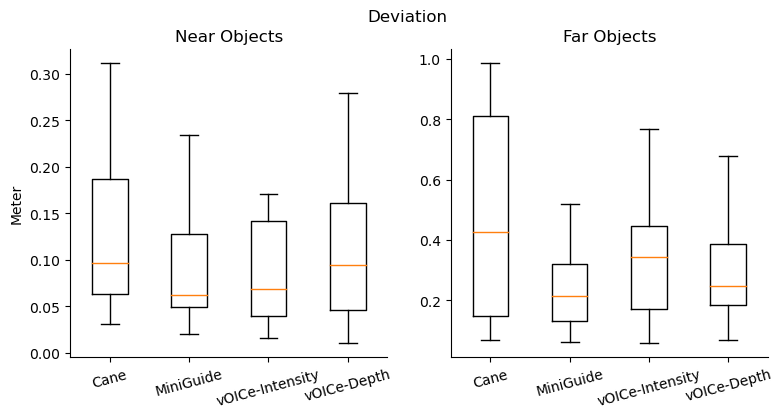

In [52]:
# Deviation mean 

# Create a figure and axis
fig, axs = plt.subplots(1,2,figsize=(9,4));

# axs[0].boxplot([cane_near.Response_time[cane_near.Response_time != 0], mini_near.Response_time[mini_near.Response_time!=0],voiceinten_near.Response_time[voiceinten_near.Response_time!=0],voicedepth_near.Response_time[voicedepth_near.Response_time!0]],labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'],  showfliers=False);

axs[0].boxplot([
    cane_near.Deviation_mean[cane_near.Deviation_mean != 0]/1000,
    mini_near.Deviation_mean[mini_near.Deviation_mean != 0]/1000,
    voiceinten_near.Deviation_mean[voiceinten_near.Deviation_mean != 0]/1000,
    voicedepth_near.Deviation_mean[voicedepth_near.Deviation_mean != 0]/1000
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'], showfliers=False);

axs[0].set_xticks([1,2,3,4],locate_xtick, rotation = 15)

axs[1].boxplot([
    cane_far.Deviation_mean[cane_far.Deviation_mean != 0]/1000,
    mini_far.Deviation_mean[mini_far.Deviation_mean != 0]/1000,
    voiceinten_far.Deviation_mean[voiceinten_far.Deviation_mean != 0]/1000,
    voicedepth_far.Deviation_mean[voicedepth_far.Deviation_mean != 0]/1000
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'], showfliers=False);

axs[1].set_xticks([1,2,3,4],locate_xtick, rotation = 15);

# axs[0].set_ylim([0,1000])
# axs[1].set_ylim([0,1000])

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[0].set_title('Near Objects')
axs[1].set_title('Far Objects')
axs[0].set_ylabel('Meter')
fig.suptitle('Deviation')

Text(0.5, 0.98, 'Marginal stability')

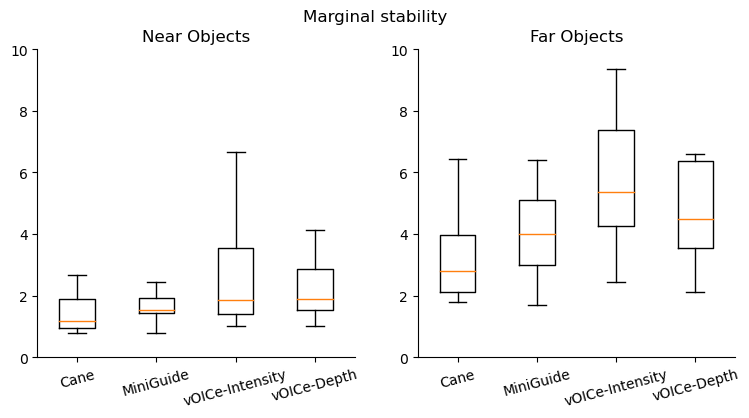

In [53]:
# Mos mean 

# Create a figure and axis
fig, axs = plt.subplots(1,2,figsize=(9,4));

# axs[0].boxplot([cane_near.Response_time[cane_near.Response_time != 0], mini_near.Response_time[mini_near.Response_time!=0],voiceinten_near.Response_time[voiceinten_near.Response_time!=0],voicedepth_near.Response_time[voicedepth_near.Response_time!0]],labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'],  showfliers=False);

axs[0].boxplot([
    cane_near.Mos_all[cane_near.Mos_all != 0]/100000,
    mini_near.Mos_all[mini_near.Mos_all != 0]/100000,
    voiceinten_near.Mos_all[voiceinten_near.Mos_all != 0]/100000,
    voicedepth_near.Mos_all[voicedepth_near.Mos_all != 0]/100000
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'], showfliers=False);

axs[0].set_xticks([1,2,3,4],locate_xtick, rotation = 15)

axs[1].boxplot([
    cane_far.Mos_all[cane_far.Mos_all != 0]/100000,
    mini_far.Mos_all[mini_far.Mos_all != 0]/100000,
    voiceinten_far.Mos_all[voiceinten_far.Mos_all != 0]/100000,
    voicedepth_far.Mos_all[voicedepth_far.Mos_all != 0]/100000
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'], showfliers=False);

axs[1].set_xticks([1,2,3,4],locate_xtick, rotation = 15);

axs[0].set_ylim([0,10])
axs[1].set_ylim([0,10])

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[0].set_title('Near Objects')
axs[1].set_title('Far Objects')
# axs[0].set_ylabel('Meter')
fig.suptitle('Marginal stability')

Text(0.5, 0.98, 'Hesitation')

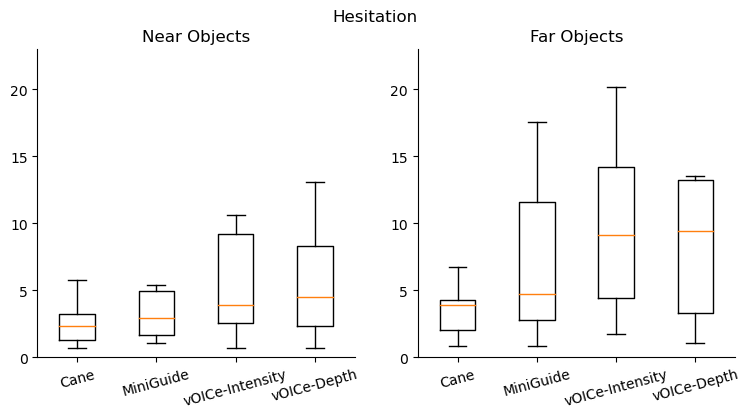

In [54]:
# Hesitation 

# Create a figure and axis
fig, axs = plt.subplots(1,2,figsize=(9,4));

# axs[0].boxplot([cane_near.Response_time[cane_near.Response_time != 0], mini_near.Response_time[mini_near.Response_time!=0],voiceinten_near.Response_time[voiceinten_near.Response_time!=0],voicedepth_near.Response_time[voicedepth_near.Response_time!0]],labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'],  showfliers=False);

axs[0].boxplot([
    cane_near.hesitation_segments[cane_near.hesitation_segments != 0]/160,
    mini_near.hesitation_segments[mini_near.hesitation_segments != 0]/160,
    voiceinten_near.hesitation_segments[voiceinten_near.hesitation_segments != 0]/160,
    voicedepth_near.hesitation_segments[voicedepth_near.hesitation_segments != 0]/160
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'], showfliers=False);

axs[0].set_xticks([1,2,3,4],locate_xtick, rotation = 15)

axs[1].boxplot([
    cane_far.hesitation_segments[cane_far.hesitation_segments != 0]/160,
    mini_far.hesitation_segments[mini_far.hesitation_segments != 0]/160,
    voiceinten_far.hesitation_segments[voiceinten_far.hesitation_segments != 0]/160,
    voicedepth_far.hesitation_segments[voicedepth_far.hesitation_segments != 0]/160
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'], showfliers=False);

axs[1].set_xticks([1,2,3,4],locate_xtick, rotation = 15);

axs[0].set_ylim([0,23])
axs[1].set_ylim([0,23])

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[0].set_title('Near Objects')
axs[1].set_title('Far Objects')
# axs[0].set_ylabel('mm')
fig.suptitle('Hesitation')

Text(0.5, 0.98, 'Found distance')

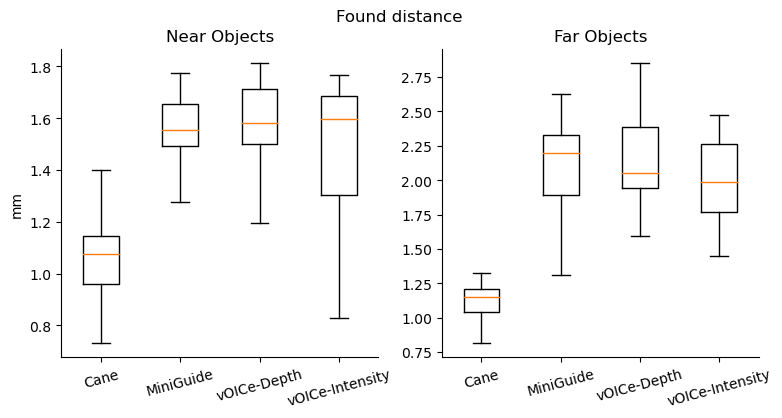

In [90]:
# Found distance 

# Create a figure and axis
fig, axs = plt.subplots(1,2,figsize=(9,4));

# axs[0].boxplot([cane_near.Response_time[cane_near.Response_time != 0], mini_near.Response_time[mini_near.Response_time!=0],voiceinten_near.Response_time[voiceinten_near.Response_time!=0],voicedepth_near.Response_time[voicedepth_near.Response_time!0]],labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'],  showfliers=False);

axs[0].boxplot([
    cane_near.Found_distance_int[cane_near.Found_distance_int != 0],
    mini_near.Found_distance_int[mini_near.Found_distance_int != 0],
    voiceinten_near.Found_distance_int[voiceinten_near.Found_distance_int != 0],
    voicedepth_near.Found_distance_int[voicedepth_near.Found_distance_int != 0]
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'], showfliers=False);

axs[0].set_xticks([1,2,3,4],locate_xtick, rotation = 15)

axs[1].boxplot([
    cane_far.Found_distance_int[cane_far.Found_distance_int != 0],
    mini_far.Found_distance_int[mini_far.Found_distance_int != 0],
    voiceinten_far.Found_distance_int[voiceinten_far.Found_distance_int != 0],
    voicedepth_far.Found_distance_int[voicedepth_far.Found_distance_int != 0]
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'], showfliers=False);

axs[1].set_xticks([1,2,3,4],locate_xtick, rotation = 15);

# axs[0].set_ylim([0,1000])
# axs[1].set_ylim([0,1000])

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[0].set_title('Near Objects')
axs[1].set_title('Far Objects')
axs[0].set_ylabel('mm')
fig.suptitle('Found distance')